In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as scio

%load_ext autoreload
%autoreload 2
import main

In [2]:
mat = scio.loadmat('ex8data2.mat')

x = pd.DataFrame(mat['X'])
xval = pd.DataFrame(mat['Xval'])
yval = pd.DataFrame(mat['yval']).iloc[:, 0]

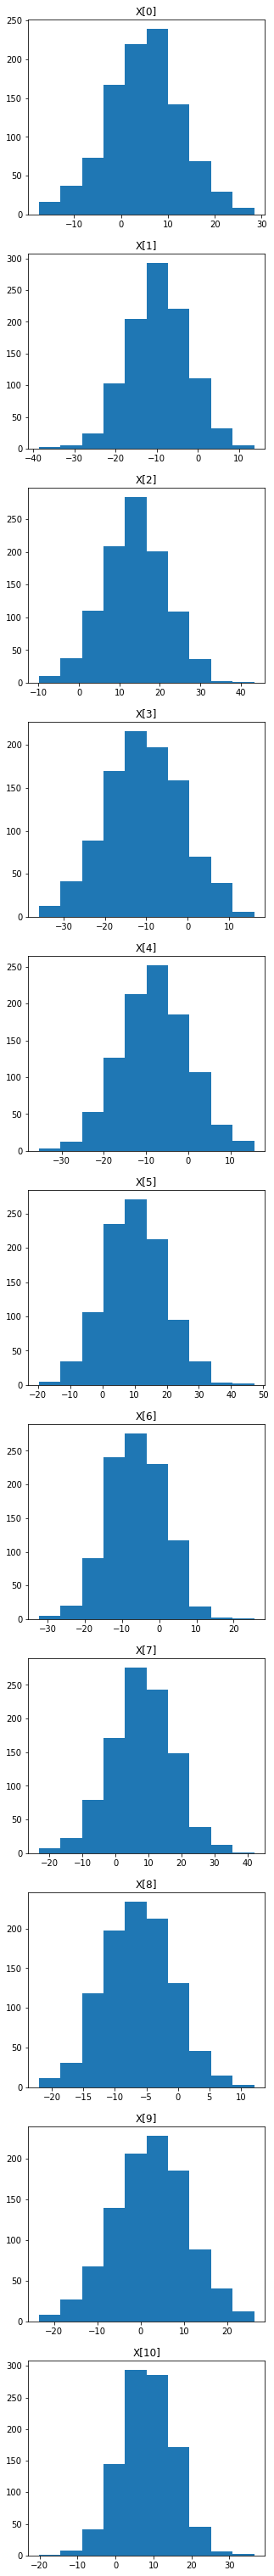

In [8]:
count = x.shape[1]
_, subplots = plt.subplots(count, 1, figsize=(5, count*5))

for i in range(count):
    subplots[i].hist(x.iloc[:, i])
    subplots[i].set_title('X[{}]'.format(i))

plt.show()

In [6]:
mean, variance = main.gaussian_params(x)
print('Mean', mean)
print('Variance', variance)

Mean [  4.94434469  -9.64691511  13.82853602 -10.47496376  -7.96419342
  10.20971344  -6.02543298   7.97780676  -6.25944134   2.32683973
   8.48220473]
Variance [60.97491817 53.20581493 58.51565394 84.20414697 65.2686552  89.57498181
 55.63353541 87.16240148 29.62930747 70.78521062 50.50363914]


In [27]:
e_range = np.logspace(-20, -0.1, 100)
e = main.choose_threshold(xval, mean, variance, yval, e_range)
print('Best epsilon:', e)

val_prediction = main.predict(xval, mean, variance, e)
print('Precision:', main.precision(val_prediction, yval))
print('Recall:', main.recall(val_prediction, yval))
print('F1 score:', main.f1_score(val_prediction, yval))

prediction = main.predict(x, mean, variance, e)
print('Detected anomalies: {}'.format(prediction.sum()))

Best epsilon: 1.01169709987675e-19
Precision: 0.7777777777777778
Recall: 0.7
F1 score: 0.7368421052631577
Detected anomalies: 32
